In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
data = pd.read_csv('customer.csv')
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [3]:
df = data[['Yearly_Income','Cust_Spend_Score']]
df.head()

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41


In [4]:
#scaling
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [5]:
df_SS = SS.fit_transform(df)
df_SS = pd.DataFrame(df_SS,columns = df.columns)
df_SS.head(2)

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563


In [8]:
#ELbow plot
err =[]
for i in range(1,10):
    km= KMeans(n_clusters = i)
    km.fit(df_SS)
    err.append(km.inertia_)
err        
        

[400.0,
 270.041273648644,
 158.57318648271084,
 110.00511756050395,
 66.69647392440946,
 56.016232266055795,
 45.50439585313613,
 38.30690563322014,
 33.59999402930586]

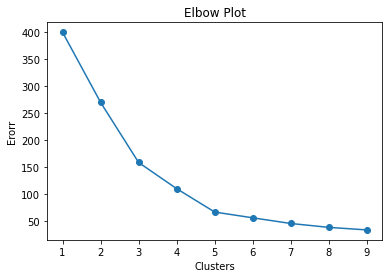

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),err,marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Erorr')
plt.title('Elbow Plot')
plt.show()

In [10]:
#model_building
model = KMeans(n_clusters = 5,random_state = 100)
model.fit(df_SS)
model.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4])

In [11]:
df['label'] = model.labels_
df.head()

,Yearly_Income,Cust_Spend_Score,label
0,15000,44,0
1,15000,79,2
2,16000,8,0
3,16000,79,2
4,17000,41,0


In [20]:
#cluster 0 
df_0 = df[df['label']==0]
df_0.drop(columns = ['label']).describe()

,Yearly_Income,Cust_Spend_Score
count,23.000000,23.000000
mean,26304.347826,22.130435
std,7893.811055,13.222929
min,15000.000000,1.000000
25%,19500.000000,10.500000
50%,25000.000000,20.000000
75%,33000.000000,33.500000
max,39000.000000,44.000000


In [21]:
#cluster 1
df_1 = df[df['label']==1]
df_1.drop(columns = ['label']).describe()

,Yearly_Income,Cust_Spend_Score
count,80.00000,80.000000
mean,54687.50000,51.200000
std,8839.77454,6.404903
min,39000.00000,39.000000
25%,47750.00000,47.000000
50%,54000.00000,51.000000
75%,62000.00000,56.000000
max,76000.00000,65.000000


In [22]:
df.groupby('label').mean()

,Yearly_Income,Cust_Spend_Score
label,,
0,26304.347826,22.130435
1,54687.500000,51.200000
2,25095.238095,81.619048
3,87297.297297,19.000000
4,86538.461538,83.435897


In [23]:
df.groupby('label').sum()

,Yearly_Income,Cust_Spend_Score
label,,
0,605000,509
1,4375000,4096
2,527000,1714
3,3230000,703
4,3375000,3254


<AxesSubplot:xlabel='label', ylabel='count'>

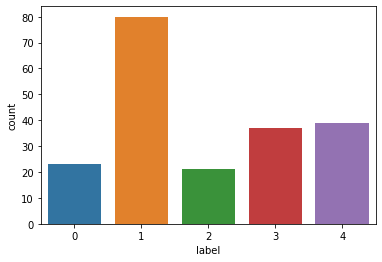

In [24]:
sns.countplot(df['label'])

<AxesSubplot:xlabel='label'>

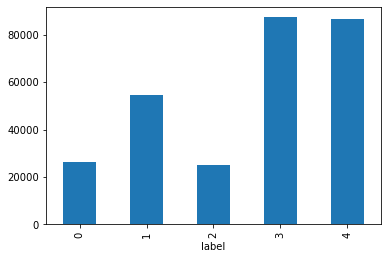

In [25]:
df.groupby('label').mean()['Yearly_Income'].plot(kind = 'bar')

<AxesSubplot:xlabel='label'>

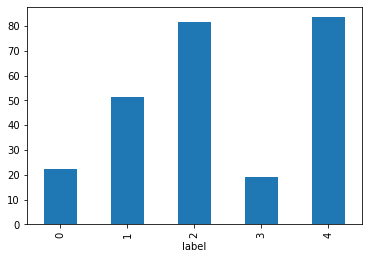

In [26]:
df.groupby('label').mean()['Cust_Spend_Score'].plot(kind = 'bar')

In [28]:
!pip install yellowbrick
import yellowbrick

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Silhouttee score for  2 cluster is 0.2907934008243553


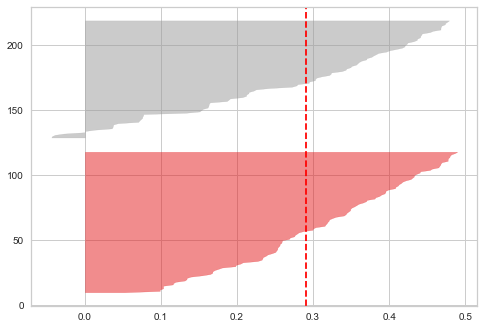

Silhouttee score for  3 cluster is 0.4655232553320422


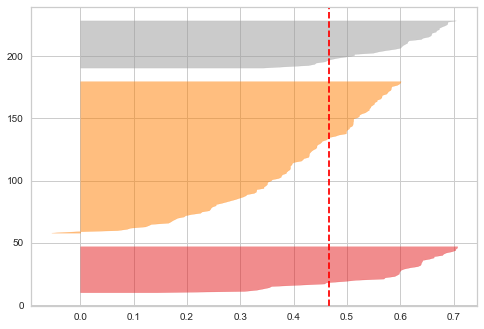

Silhouttee score for  4 cluster is 0.4953283597895246


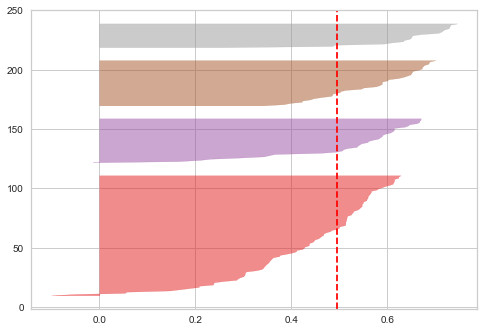

Silhouttee score for  5 cluster is 0.5520621436364275


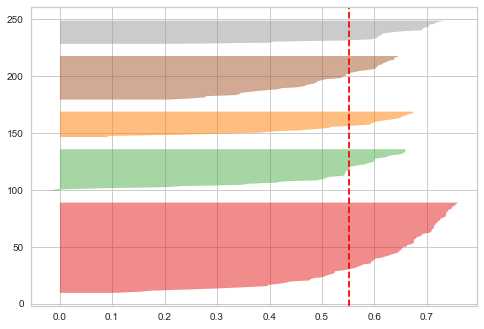

Silhouttee score for  6 cluster is 0.5400545310397922


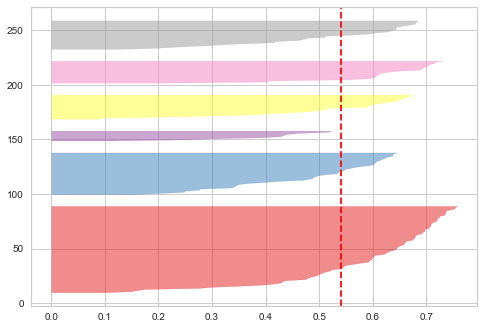

Silhouttee score for  7 cluster is 0.5301955242744942


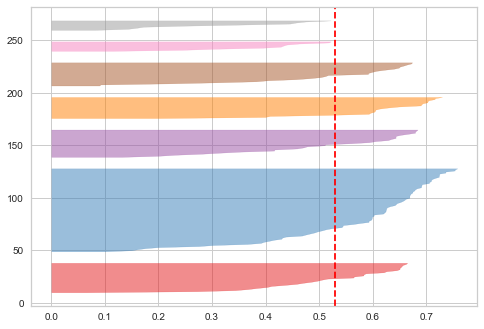

Silhouttee score for  8 cluster is 0.4502728833383564


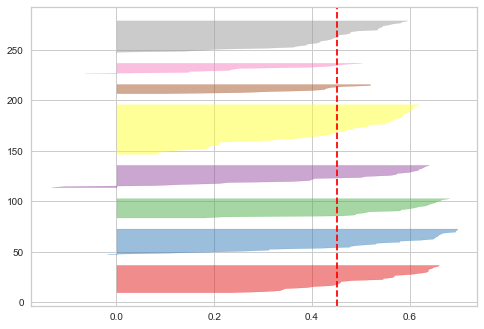

Silhouttee score for  9 cluster is 0.4528215090321182


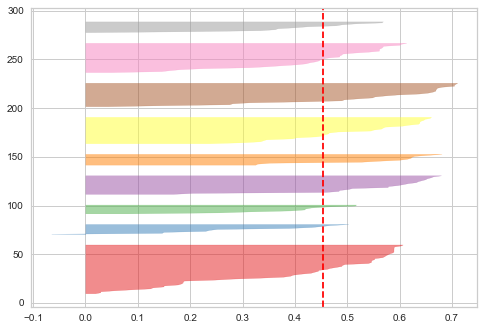

In [30]:
for i in range(2,10):
    km = KMeans(n_clusters = i)
    km.fit(df_SS)
    sil_score= silhouette_score(df_SS,km.labels_)
    print('Silhouttee score for ',i,'cluster is',sil_score)
    
    
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(df_SS)
    plt.show()

In [31]:
model.cluster_centers_ #for finding centres 

array([[-1.30751869, -1.12631231],
       [-0.22414997, -0.00693126],
       [-1.35366972,  1.16441429],
       [ 1.02054738, -1.24685589],
       [ 0.99158305,  1.23437568]])

In [35]:
df['label'].value_counts(normalize = True)*100

1    40.0
4    19.5
3    18.5
0    11.5
2    10.5
Name: label, dtype: float64

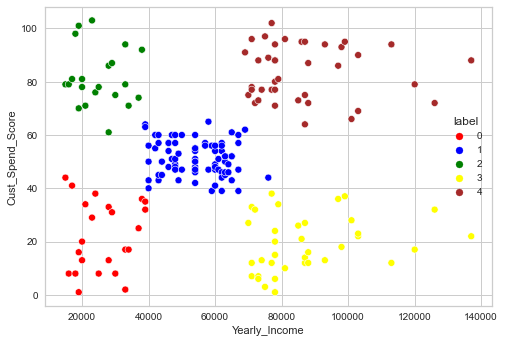

In [32]:
sns.scatterplot(df.Yearly_Income,df.Cust_Spend_Score,hue = df['label'],palette = ['red','blue','green','yellow','brown'])
plt.show()

In [ ]:
## Inferences :

#Label 0 - Consists of customers with lower income and low spending score .
#Recomendation : Can send notifications to these customers durng sales , however the  number of customers under this category
#is less ie 11% in total .

# Label 1- Consists of customers with an yearly income of 40k-70k with spending score of 40-60.These customers should be 
# treated properly as they consists of 40% of the overall customer base. SPecial offers during sales , Loyalty card points
# and other special advantages is to be given so as to retain them.

#Label 2 - Consists of customers with lower income but high spending score (rare situation)
#Recomendation : Since  the  number of customers under this category is very less ie 10% in total ,they could be those one 
# buyers .Their activity cant be tracked . 

##### Hirarchial clustering

In [36]:

import matplotlib.pyplot as plt
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [37]:
data = pd.read_csv('grains.csv')
data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [38]:
df = data

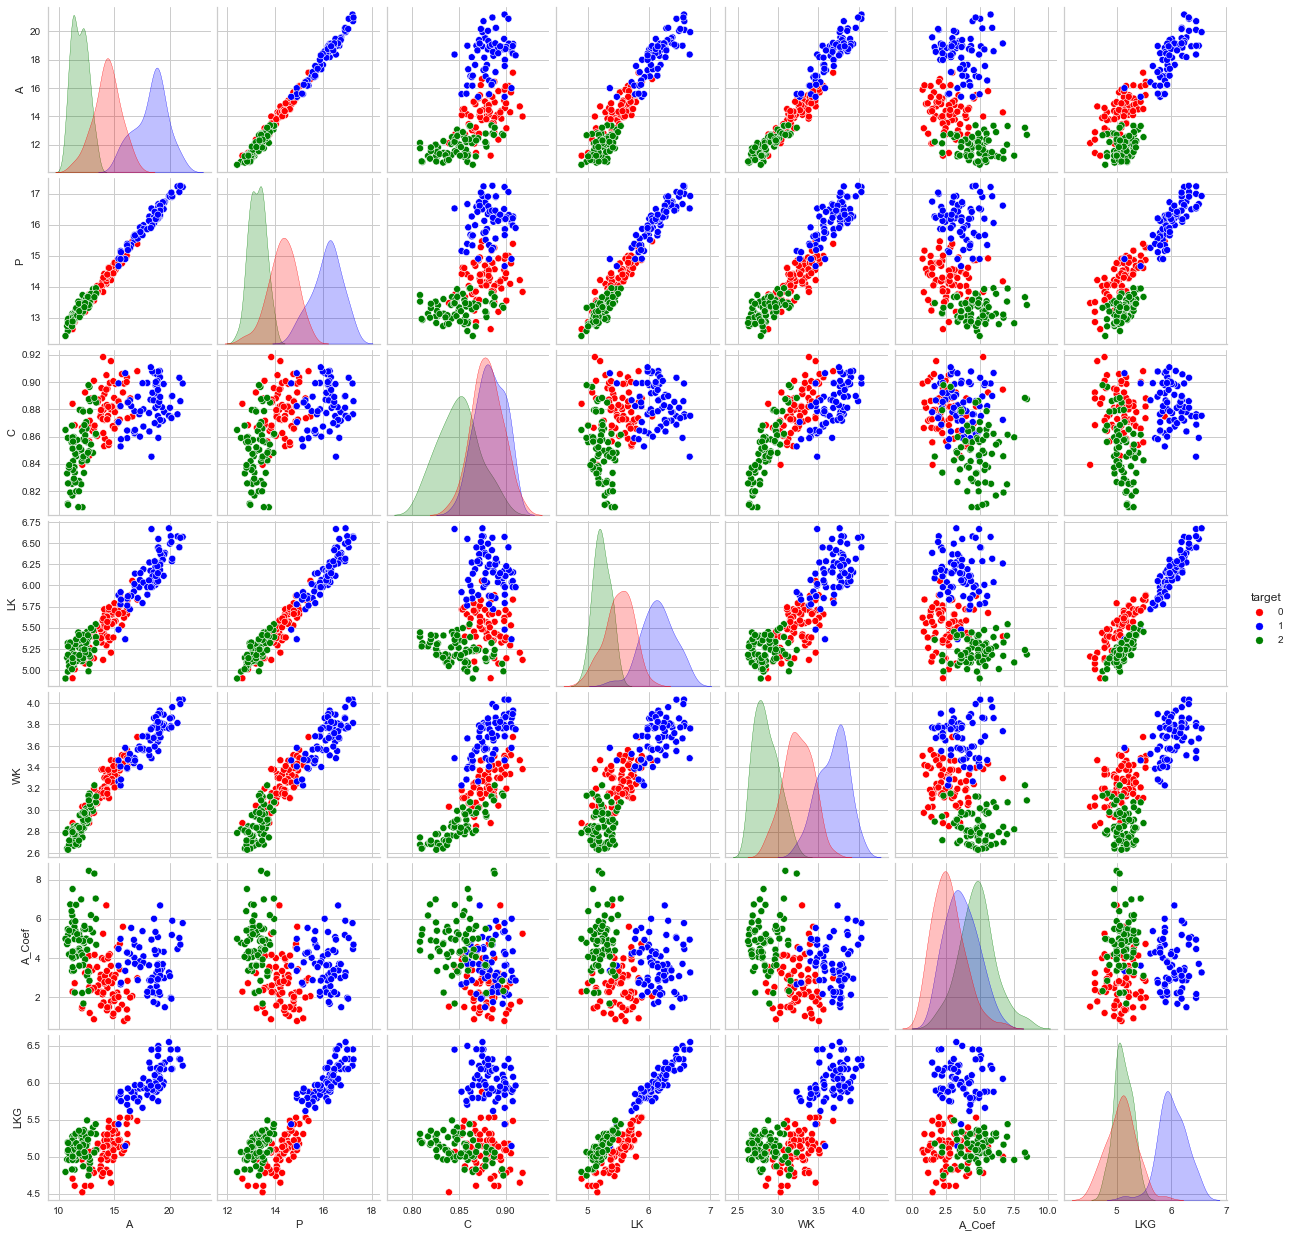

In [66]:
sns.pairplot(data = data,vars = ['A','P','C','LK','WK','A_Coef','LKG'df.drop(columns = 'target',inplace = True)],hue = 'target',palette = ['red','blue','green'])

In [39]:
df.drop(columns = 'target',inplace = True)

In [40]:
#scaling
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [41]:
df_SS = SS.fit_transform(df)
df_SS = pd.DataFrame(df_SS,columns = df.columns)
df_SS.head(2)

,A,P,C,LK,WK,A_Coef,LKG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013


In [42]:
from sklearn.cluster import KMeans

err =[]
for i in range(1,10):
    km= KMeans(n_clusters = i)
    km.fit(df_SS)
    err.append(km.inertia_)
err        
   

[1470.0000000000002,
 659.1717544870406,
 430.65897315130064,
 371.58119097155253,
 327.47320558819666,
 288.8906063281293,
 262.80314509457304,
 242.56276913243673,
 222.1590087158067]

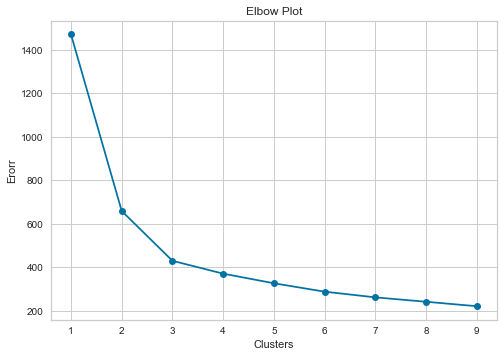

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),err,marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('Erorr')
plt.title('Elbow Plot')
plt.show()

In [44]:
for i in range(2,10):
    km = KMeans(n_clusters = i)
    model = km.fit(df_SS)
    sil_score= silhouette_score(df_SS,model.labels_)
    print('Silhouttee score for ',i,'cluster is',sil_score)
    
    

Silhouttee score for  2 cluster is 0.46577247686580914
Silhouttee score for  3 cluster is 0.40072705527512986
Silhouttee score for  4 cluster is 0.32757426605518075
Silhouttee score for  5 cluster is 0.2863816249628832
Silhouttee score for  6 cluster is 0.28697773462201287
Silhouttee score for  7 cluster is 0.28568334858491784
Silhouttee score for  8 cluster is 0.25648169582761887
Silhouttee score for  9 cluster is 0.2617040286313349


In [45]:
km = KMeans(n_clusters = 3) ##3 clusters seem to give better segregation of clusters based on elbow plot and silhoutee scores
modell = km.fit(df_SS)

In [46]:
df_k = df.copy()
df_k

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [47]:
df_k['Label'] = modell.labels_

In [48]:
df_k.head()

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [50]:
df_k.Label.value_counts(normalize = True)*100

2    34.285714
0    33.809524
1    31.904762
Name: Label, dtype: float64

<AxesSubplot:>

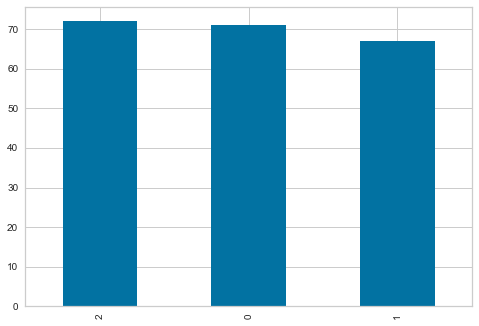

In [51]:
df_k.Label.value_counts().plot(kind ='bar')

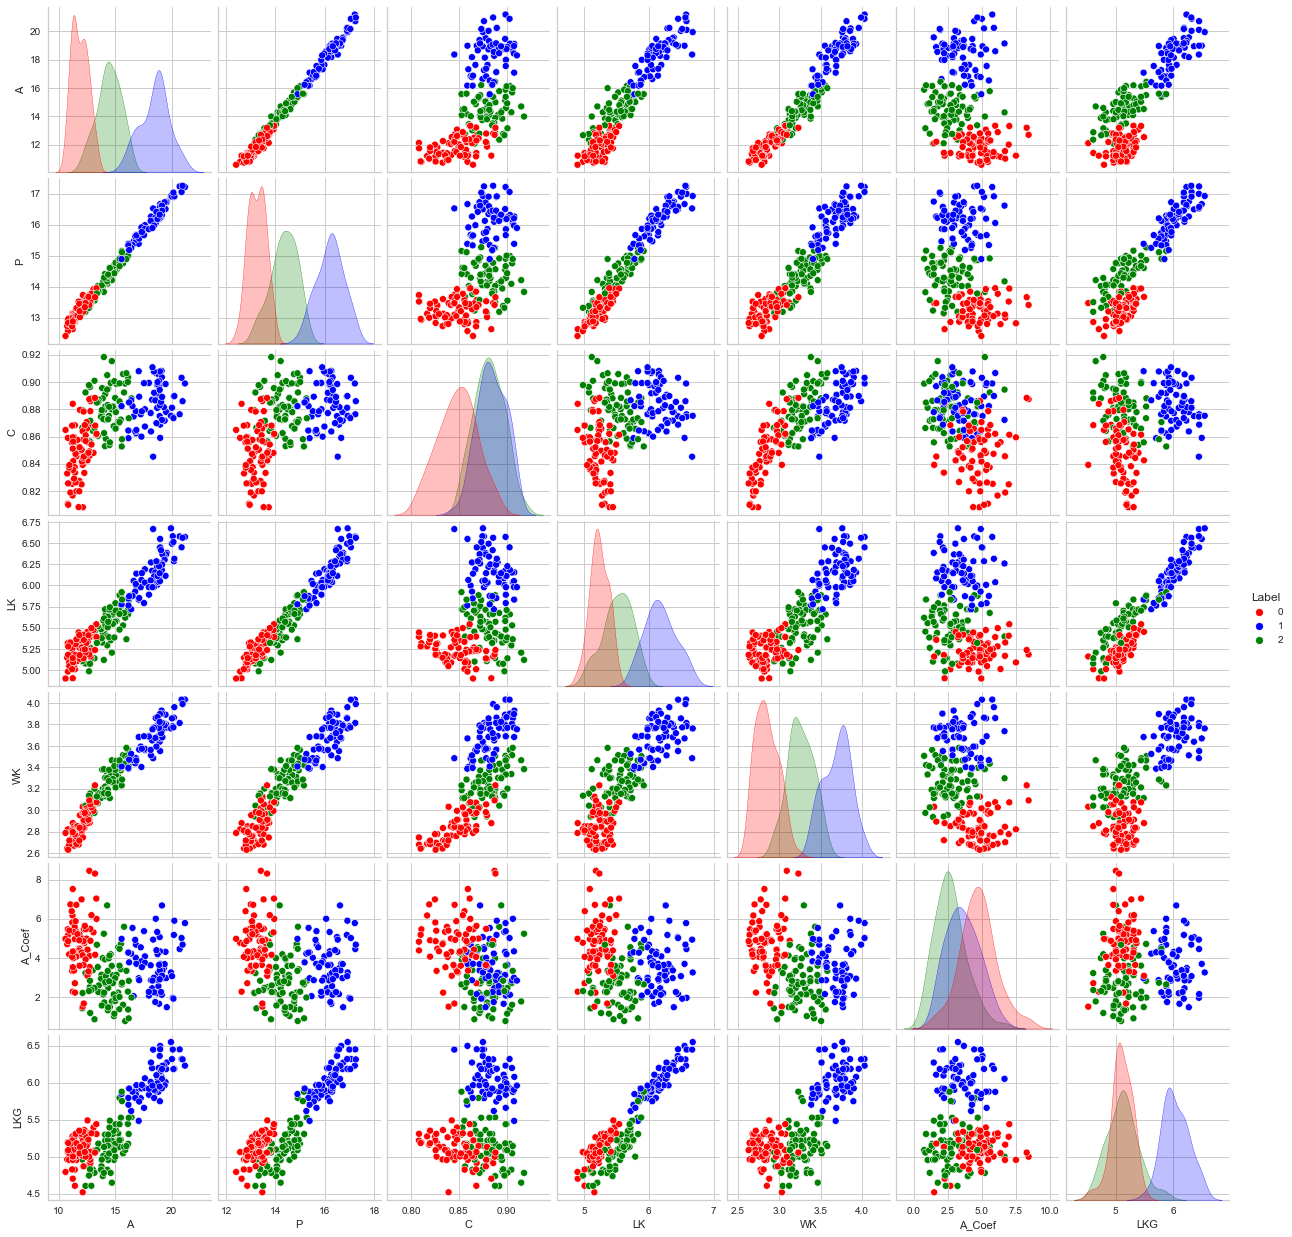

In [80]:
sns.pairplot(data = df_k,hue = 'Label',palette = ['red','blue','green'])
plt.show()

In [52]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

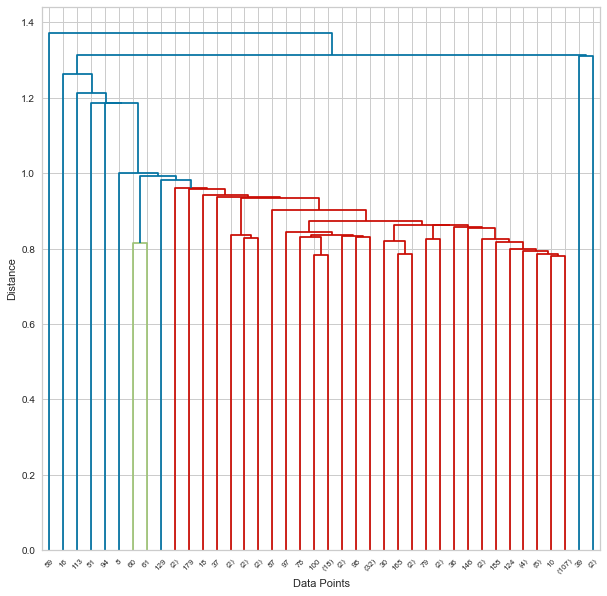

In [53]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='single')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

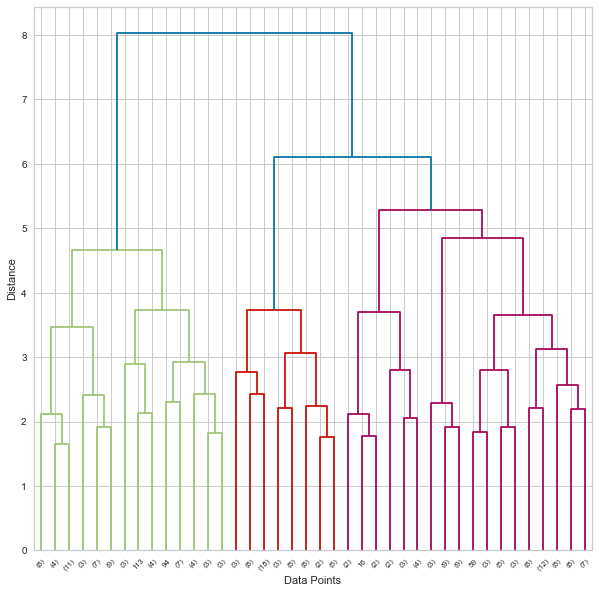

In [54]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='complete')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

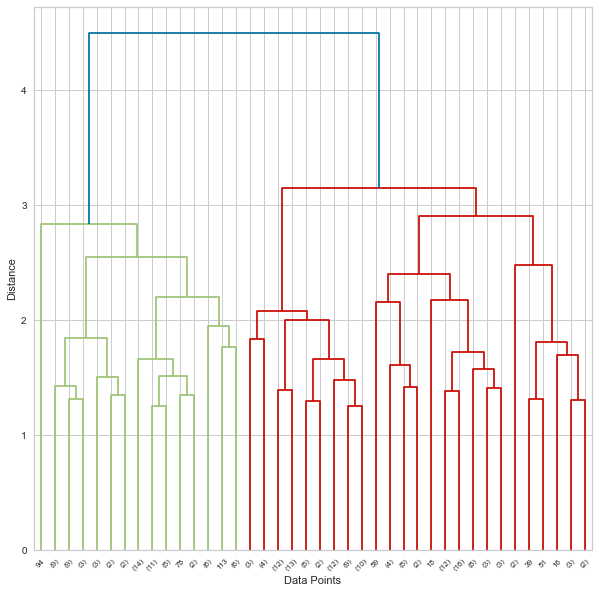

In [55]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='average')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

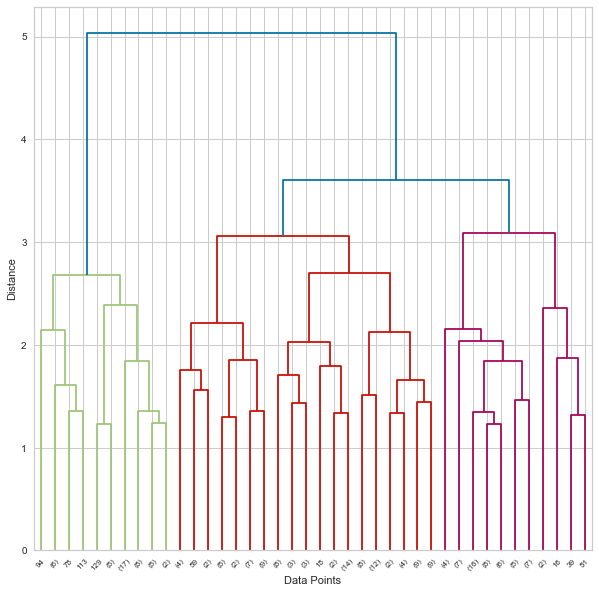

In [56]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='weighted')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

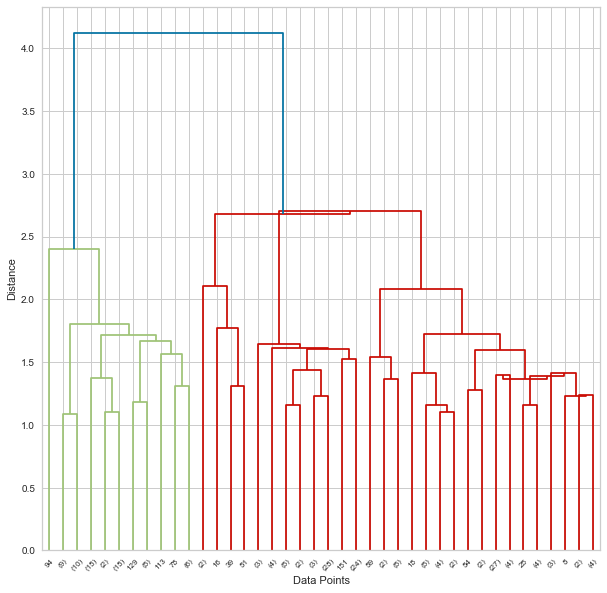

In [53]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='centroid')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

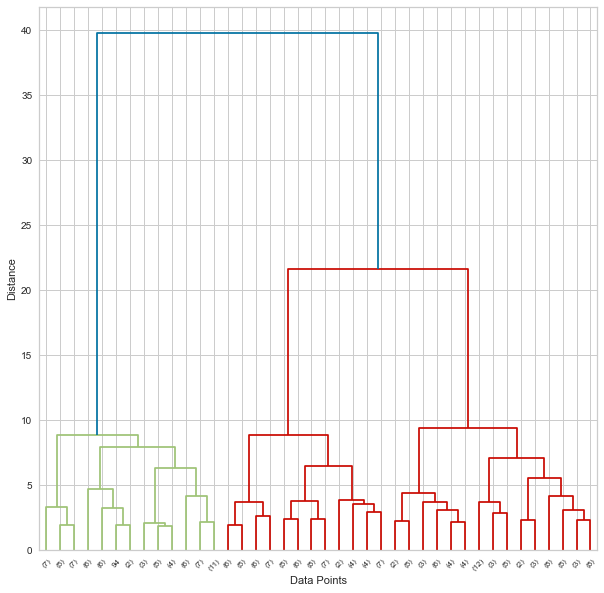

In [57]:
plt.figure(figsize = (10,10) )
Z = linkage(df_SS,method='ward')
dendrogram(Z,truncate_mode = 'lastp',p = 40)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [58]:
# for finding best method to be used in anglomeration use cophenic coeff
from scipy.spatial.distance import pdist
link = ['single','complete','average','centroid','ward']
for i  in link:
    Z = linkage(df_SS,i)
    c,coph_dists = cophenet(Z,pdist(df_SS))
    print('Cophenetic coeff  for ',i,c)
    

Cophenetic coeff  for  single 0.4266838473609089
Cophenetic coeff  for  complete 0.7129628799252149
Cophenetic coeff  for  average 0.7146889209200192
Cophenetic coeff  for  centroid 0.7374128094649327
Cophenetic coeff  for  ward 0.7285528540866004


In [59]:
df_h = df.copy()

In [60]:
df_h.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [61]:
clusters = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters.fit(df_SS)

AgglomerativeClustering(n_clusters=3)

In [62]:
df_h['Label'] = clusters.labels_

In [63]:
df_h.head()

,A,P,C,LK,WK,A_Coef,LKG,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier


In [65]:
x = df_k.drop('Label',1)
y = df_k['Label']

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state = 100) ##Kmeans Clustering model
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y_pred_dt_k=dt.predict(xtest)

print(confusion_matrix(ytest,y_pred_dt_k))
print(accuracy_score(ytest,y_pred_dt_k))
print(classification_report(ytest,y_pred_dt_k))

[[ 9  0  0]
 [ 3 12  0]
 [ 1  0 17]]
0.9047619047619048
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.80      0.89        15
           2       1.00      0.94      0.97        18

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.89        42
weighted avg       0.93      0.90      0.91        42



In [67]:
x1 = df_h.drop('Label',1) #building model for hirarchial clustering 
y1 = df_h['Label']

In [68]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,test_size=0.20,random_state = 100)
dt1 = DecisionTreeClassifier()
dt1.fit(x1train,y1train)
y_pred_dt_h=dt1.predict(x1test)

print(confusion_matrix(y1test,y_pred_dt_h))
print(accuracy_score(y1test,y_pred_dt_h))
print(classification_report(y1test,y_pred_dt_h))

[[10  0  0]
 [ 1 13  1]
 [ 3  0 14]]
0.8809523809523809
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.87      0.93        15
           2       0.93      0.82      0.87        17

    accuracy                           0.88        42
   macro avg       0.88      0.90      0.88        42
weighted avg       0.90      0.88      0.88        42



In [69]:
#Inferences : 
# Both the clustering techniques be it Kmeans or Hirarchial seem to perform good with 90% and 88% accuracy respectively .
# however for cluster -0 , hirarchial clustering gave better f1-score
# for cluster 1 - , hirarchial clustering again gave better f1-score
# whereas for cluster 2- Kmeans gave a whoppping F1 score of 97% .

##### DBSCAN CLUSTERING 

In [70]:
data2 = pd.read_csv('db_data.csv')
data2.head()

,F1,F2,out
0,1.047751,0.071995,0
1,0.020275,0.161049,1
2,-0.671793,0.750891,0
3,-0.774415,0.649314,0
4,-0.379833,0.952658,0


In [71]:
df2 = data2.copy()

In [72]:
df2.head(1)

,F1,F2,out
0,1.047751,0.071995,0


In [73]:
km = KMeans(n_clusters = 2)
model = km.fit(df2)

<AxesSubplot:xlabel='F1', ylabel='F2'>

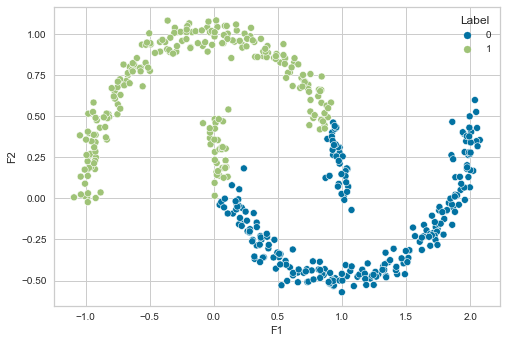

In [74]:
df2['Label']=model.labels_
sns.scatterplot(df2.F1,df2.F2,hue = df2['Label'])


In [ ]:
##Conclusion : AT times, the clusters formed using Kmeans or Hirarchial clustering may give inadequate clusters.In such a 
# situation dbscan can be used to form the clusters based on density of each data point.

In [75]:
df2.head()

,F1,F2,out,Label
0,1.047751,0.071995,0,0
1,0.020275,0.161049,1,1
2,-0.671793,0.750891,0,1
3,-0.774415,0.649314,0,1
4,-0.379833,0.952658,0,1


In [76]:
df2_S = SS.fit_transform(df2.drop('Label',1))
df2_SS = pd.DataFrame(df2_S,columns = df2.drop('Label',1).columns)

In [77]:
df2_SS.head()

,F1,F2,out
0,0.632097,-0.367892,-1.0
1,-0.548589,-0.187821,1.0
2,-1.343854,1.004871,-1.0
3,-1.461779,0.799477,-1.0
4,-1.008359,1.412853,-1.0


In [78]:
df2_SS.describe()

,F1,F2,out
count,5.000000e+02,5.000000e+02,500.000000
mean,3.708145e-17,5.684342e-17,0.000000
std,1.001002e+00,1.001002e+00,1.001002
min,-1.825783e+00,-1.668639e+00,-1.000000
25%,-6.079059e-01,-9.177963e-01,-1.000000
50%,-1.422208e-02,2.066020e-02,0.000000
75%,6.154095e-01,9.203320e-01,1.000000
max,1.811328e+00,1.679141e+00,1.000000


In [79]:
db2 = DBSCAN(eps = 0.2,min_samples=5)
db2.fit(df2_SS.iloc[:,0:2])
df2_SS['Label']= db2.labels_


In [80]:
df2_SS.head()

,F1,F2,out,Label
0,0.632097,-0.367892,-1.0,0
1,-0.548589,-0.187821,1.0,1
2,-1.343854,1.004871,-1.0,0
3,-1.461779,0.799477,-1.0,0
4,-1.008359,1.412853,-1.0,0


<AxesSubplot:xlabel='F1', ylabel='F2'>

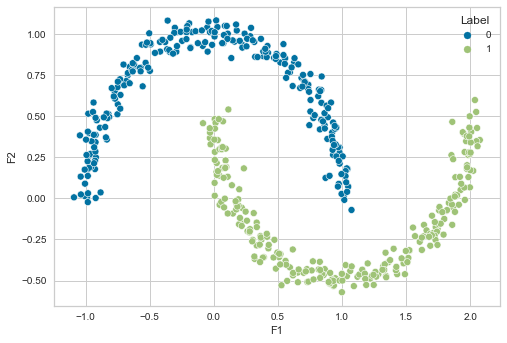

In [81]:
from sklearn.cluster import DBSCAN #unscaled data
db = DBSCAN(eps = 0.2,min_samples=5)
db.fit(df2.iloc[:,0:2])
df2['Label']= db.labels_
sns.scatterplot(df2.F1,df2.F2,hue =df2['Label'])

<AxesSubplot:xlabel='F1', ylabel='F2'>

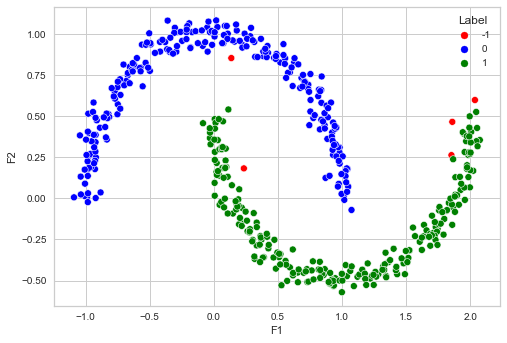

In [82]:
db = DBSCAN(eps = 0.1,min_samples=5)
db.fit(df2.iloc[:,0:2])
df2['Label']= db.labels_
sns.scatterplot(df2.F1,df2.F2,hue =df2['Label'],palette = ['red','blue','green'])

In [83]:
## The noice ie outliers (that do not come under any cluster) can easily be indentified by dbscan clustering technique
## with label as -1.